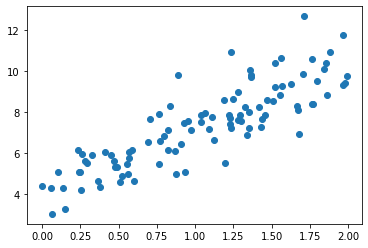

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x=2*np.random.rand(100, 1) # 0과 1사이의 균일분포에서 추출 => shape 100 x 1, 최종 범위 0~2
y= 4+3*x+np.random.randn(100, 1) # normal 분포, mu=0, var=1, shape 100 x 1, noise term
plt.scatter(x,y)
plt.show()

In [2]:
x_b = np.c_[np.ones((100,1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.09339163],
       [3.12004925]])

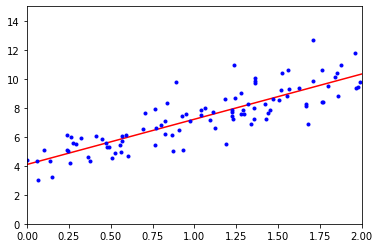

In [3]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]

prediction = x_new_b.dot(theta_best)
prediction
plt.plot(x_new,prediction,"r-")
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [4]:
# 정규방정식을 사용하던 것을 간단하게

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_,lin_reg.coef_)

[4.09339163] [[3.12004925]]


In [5]:
# 요즘에는 경사 하강법을 많이 사용한다.
# 지정한 비용함수(ex MSE)를 최소화하기 위해 파라미터를 반복적으로 수정

# 1. 무작위로 벡터 세타를 초기화한다.
# 2. 파라미터 벡터 세타에 대해 비용 함수(Loss Function)의 현재 그래디언트를 계산한다.
# 3. 그리고 그래디언트가 감소하는 방향으로 진행하면서, 최종적으로 계산된 그래디언트가 0이 되면 최솟값에 도달하도록 해야 한다.

# 경사 하강법 전에는 반드시 모든 특성을 같은 스케일을 사용하여서 데이터 변환을 하여야 한다.
# 사이킷 런 라이브러리에서 각 특성에서 평균을 빼고 표준편차로 나누어 평균은 0 분산을 1로 만드는 StandardScaler

In [6]:
# gradient descent
import numpy as np
x=2*np.random.rand(100,1) # 100 x 1
x_b=np.c_[np.ones((100,1)),x]
y=4+3 * x+np.random.randn(100, 1)

learning_rate = 0.001
iterations = 1000
m = x_b.shape[0] # x의 데이터 수

theta = np.random.randn(2, 1)
for iteration in range(iterations):
  gradients = 2/m*x_b.T.dot(x_b.dot(theta)-y)
  theta = theta - (learning_rate*gradients)

theta

array([[3.60938108],
       [3.1205827 ]])

In [7]:
#확률적 경사 하강법 구현
epochs = 1000
t0, t1 = 5, 50 #  학습 스케쥴 (하이퍼 파라미터)
m = x_b.shape[0] # 100개 (x 데이터)

def learning_schedule(t):
  return t0/(t+t1)

  theta = np.random,randn(2, 1) # 2x1 크기의 평균 0, 분산 1 정규 분포 추출

  for epoch in range(epochs):
    for i in range(m):
      random_index = np.random.randint(m) # 0 ~ m-1까지 랜덤 숫자 1
      xi = x_b[random_index:random_index:+1] # 1 x 2 크기
      yi = y[random_index:random_index+1] # 1 x 1 크기
      gradients = 2 * xi.T.dot(xi.dot(theta)-yi) # 1 => mini_m
      learning_rate = learning_schedule(epoch*m+i)
      theta = theta - learning_rate*gradients
theta

array([[3.60938108],
       [3.1205827 ]])

In [8]:
# 다항 회귀
# 비선형성을 띄는 데이터도 선형 모델을 활용하여서 학습 시킬 수 있다.
# 기존 특성에 log, exp, 제곱 등과 같은 basis function을 적용하여,
# 확장된 특성을 포함한 형태로 변형한 뒤 학습 시키는 것을 다항 회귀 기법이라고 한다.

In [9]:
import numpy as np
data_num = 1000
x = 3 * np.random.rand(data_num, 1) - 1
y = 0.2 * (x**2) + np.random.randn(1000, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])

[0.79317437]
[0.79317437 0.62912559]


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
# => 0.21x^2 -0.0008x

[-0.05842122] [[0.0585464  0.18403184]]


In [11]:
# 훈련 세트와 검증 세트의 모델 성능을 살펴보는 것 => 시각화를 통해 확인
# 시각화를 통해 더 이상의 학습이 의미가 있는지 ?
# 현재의 학습이 긍정적인 방향으로 진행이 되는지 ?

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model, x, y):
  x_train,x_val,y_train,y_val = train_test_split(x, y, test_size=0.2)
  train_errors,val_errors = [],[]
  for num in range(1, len(x_train)):
    model.fit(x_train[:num],y_train[:num])
    y_train_predict = model.predict(x_train[:num])
    y_val_predict = model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:num],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+',linewidth=2, label='train_set')
  plt.plot(np.sqrt(val_errors), 'b-',linewidth=3,label='val_set')
  plt.legend()
  plt.show()

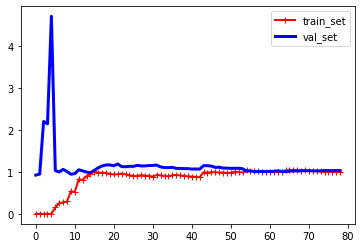

In [12]:
from sklearn.pipeline import Pipeline
data_num = 100
x = 3 * np.random.rand(data_num, 1) - 1
y = 0.2 * x**2 + np.random.randn(100, 1)
polynomial_regression = Pipeline([
                                 ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                                 ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, x, y)

In [13]:
# 규제가 있는 선형 모델
# 과적합을 감소시키는 것이 중요하다. (overfitting)

#1. 라쏘 회귀
#2. 릿지 회귀
#3. 엘라스틱넷 회귀

# 과적합을 줄이기 위해서 규제를 위한 term을 가중치로 곱해서 추가한다.

In [14]:
#1 Lasso Regression (라쏘 회귀)
#2 L1 term(절대값)에 가중치를 적절히 곱해서 규제

from sklearn.linear_model import Lasso
# alpha는 가중치인데 0.1로 두면 안되고 작은 값부터 조심스럽게 조금씩 변화 시켜야 함
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([0.22873533])

In [15]:
#2 Ridge Regression (릿지 회귀)
# 릿지 회귀는 선형 회귀의 규제된 버전
# 비용 함수에 L2 term(제곱형태) * 가중치로 규제한다.
# sovler는 default로 auto를 보통 주는데, 안드레 루이 숄레스키가 발견한 행렬 분해는 성능이 장점이다.
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[0.30981378]])

In [16]:
# Elastic Net Regression (엘라스틱넷 회귀)
# 릿지 회귀와 라쏘 회귀를 합성한 모델
# 혼합 비율 r을 적절히 조절해서 사용한다.

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([0.23652412])

In [17]:
# Early Stopping (조기 종료)
# 더 이상 원할한 학습이 이루어지지 않는다는 판단이 되면 조기에 학습을 종료한다.

# 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하기 위해서 규제항을 추가할 뿐 아니라
# 검증 에러가 휸련 에러에 비해 치솟는 다면 훈련을 중지

from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

x = 3 * np.random.rand(data_num, 1) - 1 
y = 0.2 * x**2 + np.random.randn(100,1)

poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_sclaer", StandardScaler())
])
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

# warm_start=True 이면 fit 메서드가 호출될 때 처음부터 다시 하지 않고 이전 모델 파라미터에서 훈련 이어짐
# penalty : {'l2', 'l1', 'elasticnet'}, default='l2'
# n_iter_no_change : Number of iterations with no improvement to wait before stopping fitting
# 'constant' : eta = eta0
# 'optimal' : eta = 1.0 / (alpha * (t + t0))
# 'invscaling' : eta = eta0 / pow(t, power_t)
# 'adaptive' : eta = eta0, as long as the training keeps decreasing
sgd_reg = SGDRegressor(n_iter_no_change=1, warm_start=True, penalty=None,
                       learning_rate='constant',eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(x_train_poly_scaled, y_train.ravel())
  y_val_predict = sgd_reg.predict(x_val_poly_scaled)
  val_error = mean_squared_error(y_val,y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_eppch = epoch
    best_model = clone(sgd_reg)
    break
print('best_epoch : ',best_epoch)
print('best_model : ',best_model)

best_epoch :  None
best_model :  SGDRegressor(eta0=0.0005, learning_rate='constant', n_iter_no_change=1,
             penalty=None, warm_start=True)
